In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
iris = pd.read_csv('dataset/iris.data', names=['sep-lenght', 'sep-width', 'pet-lenght', 'pet-width', 'class'])
iris.head()

,sep-lenght,sep-width,pet-lenght,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris[['sep-lenght', 'sep-width', 'pet-lenght', 'pet-width']] #all parameters
y = iris["class"] #class labels

In [4]:
clf = KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [5]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    print(accuracy_score(y[test], clf.predict(X.iloc[test])))

0.9333333333333333
0.9333333333333333
0.8666666666666667
1.0
1.0
0.9333333333333333
1.0
1.0
1.0
0.9333333333333333


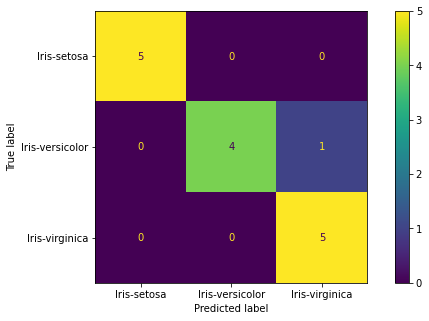

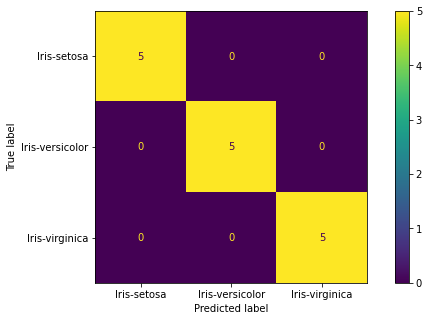

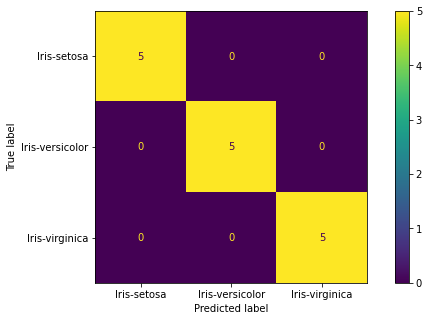

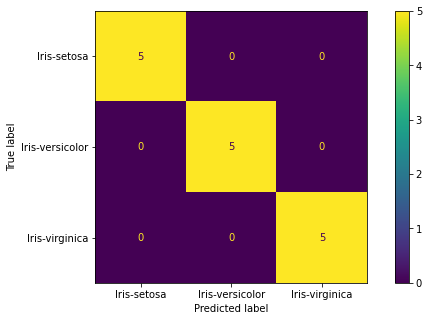

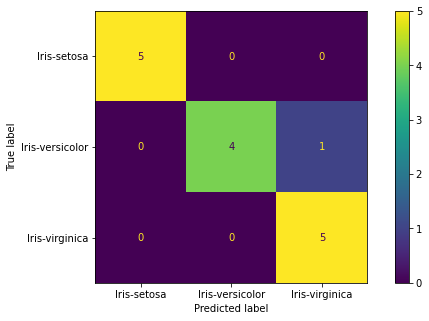

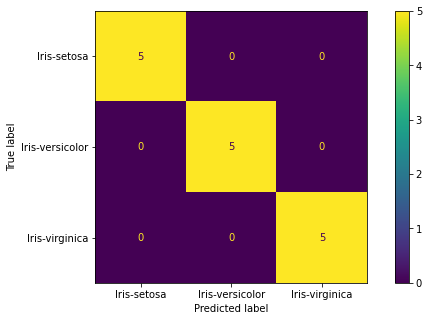

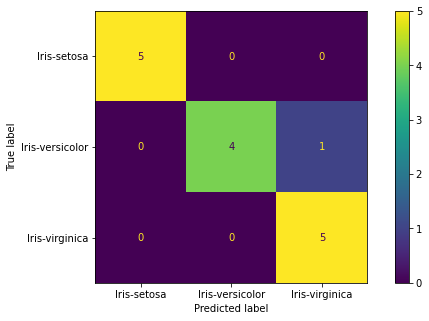

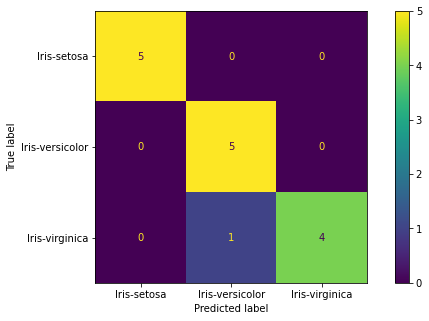

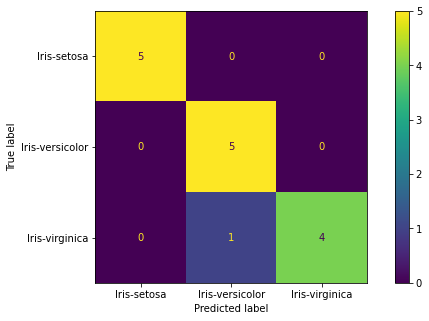

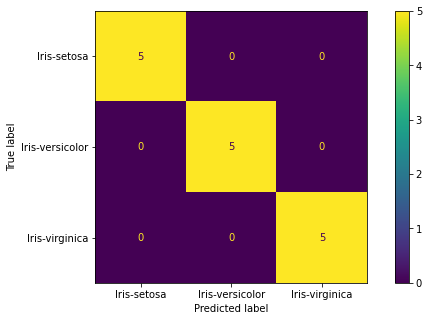

In [6]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    pred = clf.predict(X.iloc[test])
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y[test], pred, ax=ax)

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [7]:
df = pd.read_csv("dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##Fazer Análise e Exploração de dados

In [8]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']] #all parameters
y = df["output"] #class labels

In [9]:
algorithms = {
    "KNN": (KNeighborsClassifier(), { "n_neighbors": [1,3,5]})
}

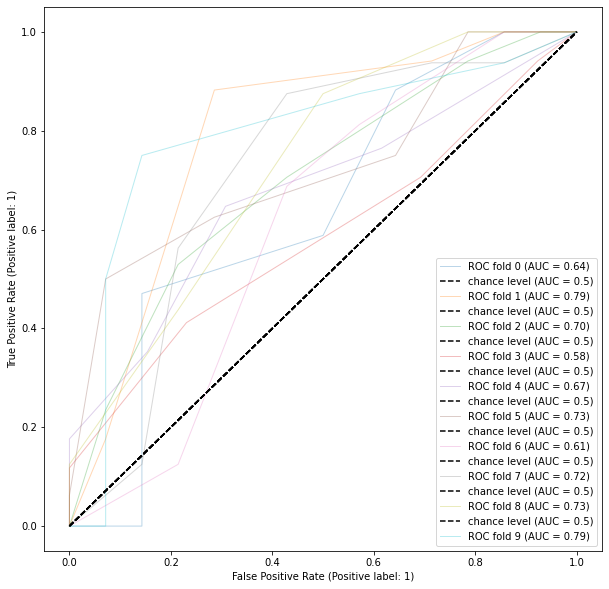

In [10]:
for algorithm, (clf, parameters) in algorithms.items():
    fig, ax = plt.subplots(figsize=(10, 10))
    for fold, (train, test) in enumerate(kf.split(X, y)):        
        clf.fit(X.iloc[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            clf,
            X.iloc[test],
            y[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        ) 
          
        ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")